# <center> EDA анализ и прогнозирование оттока клиентов </center>

Анализ производится по просьбе отдела маркетинга банка N. Требуется выяснить, какие факторы влияют на показатель оттока клиентов и подобрать модель для его последующего прогнозирования. 

Результаты исследования будут использоваться при планировании рекламных кампаний и построении системы работы с клиентом.

<hr style="border:1px solid gray"> </hr>

## Ознакомление с данными

Импортирование необходимых библиотек

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Чтение датасета

In [2]:
df = pd.read_csv(os.path.abspath('Churn_Modelling.csv'))
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


- **RowNumber:** Номер записи

- **CustomerId:** Уникальный ID пользователя

- **Surname:** Фамилия клиента

- **CreditScore:** Показатель кредитного скоринга клиента 

- **Geography:** Страна, в которой проживает клиент

- **Gender:** Гендер

- **Age:** Возраст

- **Tenure:** Количество лет пользования услугами банка

- **Balance:** Банковский баланс клиента

- **NumOfProducts:** Количество банковских продуктов, которыми пользуется клиент

- **HasCrCard:** Имеется ли у клиента кредитная карточка этого банка

- **IsActiveMember:** Является ли клиент активным для данного банка

- **EstimatedSalary:** Приблизительная заработная плата клиента в год в долларах США

- **Exited:** 1 - закрыл счет в банке, 0 - имеет открытый счёт

In [3]:
print(f'Количество строк в датасете: {df.shape[0]}')
print(f'Количество столбцов в датасете: {df.shape[1]}')

Количество строк в датасете: 10000
Количество столбцов в датасете: 14


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 2.6 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Вывод
 В таблице находятся 10000 записей и 14 характеристик. Данные пропусков не содержат. Для колонок HasCrCard, IsActiveMember, Exited используется тип данных int64, занимающий 8 байтов для каждого значения. Однако, значения там лишь {0,1} и для оптимизации можно использовать тип данных uint8 c диапазоном значений (min=0, max=255), занимающий 1 байт. Для оптимизации колонок NumOfProducts (min = 0, max = 4), Age (min = 18, max = 92) также лучше использовать тип данных uint8.  
 Для CreditScore (min = 350, max = 850) вместо int64 лучше использовать int16 (значения от -32,768 до 32,767, 2 байта). 
  Колонки Surname, RowNumber и CustomerId можно убрать, так как в Pandas подсчёт записей осуществляется автоматически, а уникальный ID пользователя для нас не информативен.

---

## Оптимизация датасета

In [6]:
df = df.astype({'HasCrCard': np.uint8,
                'IsActiveMember': np.uint8,
                'Exited': np.uint8,
                'NumOfProducts': np.uint8,
                'Age': np.uint8,
                'CreditScore': np.int16})

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int16  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  uint8  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  uint8  
 10  HasCrCard        10000 non-null  uint8  
 11  IsActiveMember   10000 non-null  uint8  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  uint8  
dtypes: float64(2), int16(1), int64(3), object(3), uint8(5)
memory usage: 2.2 MB


In [8]:
df = df.drop('RowNumber', 1)
df = df.drop('CustomerId', 1)
df = df.drop('Surname', 1)

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int16  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  uint8  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  uint8  
 7   HasCrCard        10000 non-null  uint8  
 8   IsActiveMember   10000 non-null  uint8  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  uint8  
dtypes: float64(2), int16(1), int64(1), object(2), uint8(5)
memory usage: 1.5 MB


### Вывод
В результате замены типов данных и избавления от неинформативных характеристик использование памяти сократилось почти на 45%. (с 2.6 МB до 1.5 MB).

---

## Поиск дубликатов

In [10]:
print(f'Количество полных дубликатов в датасете: {df.duplicated().sum()}')

Количество полных дубликатов в датасете: 0


### Вывод
Дубликаты отсутствуют

---

## Лемматизация
Лемматизация - это приведение слов к общему корню. Оно осуществляется для удобства последующей категоризации. Для начала нужно выяснить, какие столбцы нуждаются в лемматизации. Для этого выведем списки уникальных значений всех столбцов, имеющих тип данных object.

In [11]:
Geography_unique = df['Geography'].unique()
Gender_unique = df['Gender'].unique()
print('Страны: {}'.format(', '.join(Geography_unique)))
print('Гендеры: {}'.format(', '.join(Gender_unique)))
print(f'Уникальных значений в столбце Geography_unique: {len(Geography_unique)}')
print(f'Уникальных значений в столбце Gender_unique: {len(Gender_unique)}')

Страны: France, Spain, Germany
Гендеры: Female, Male
Уникальных значений в столбце Geography_unique: 3
Уникальных значений в столбце Gender_unique: 2


### Вывод
Данные не нуждаются в лемматизации

---

## Статистический анализ данных

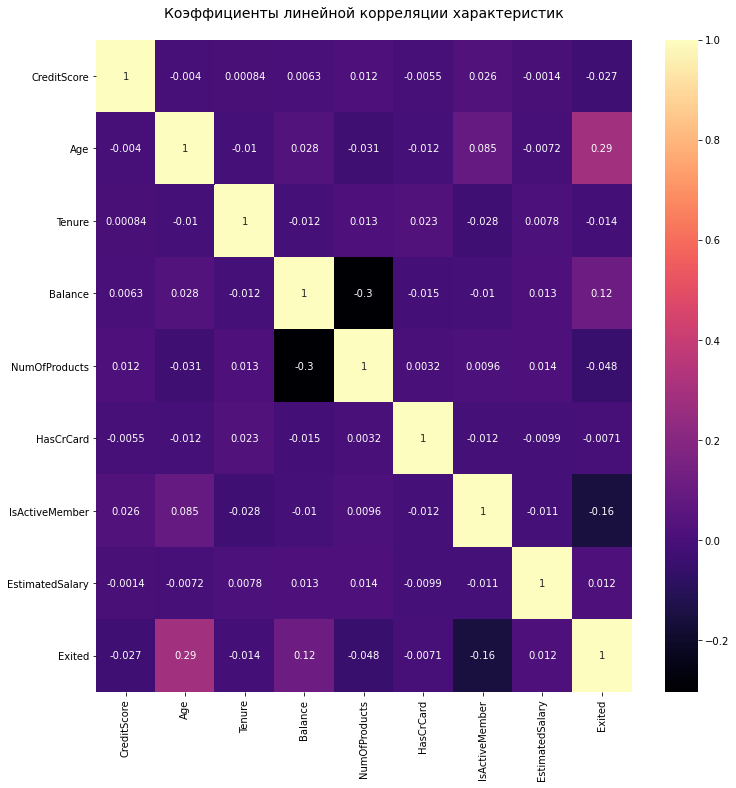

In [42]:
plt.figure(figsize=(12,12));
plt.title('Коэффициенты линейной корреляции характеристик\n', fontsize=14);
sns.heatmap(df.corr(), cmap='magma', annot=True);

### Вывод
1. Чем старше клиент, тем выше показатель его оттока
2. Отток среди активных клиентов ниже

### Есть ли зависимость между страной и оттоком клиентов?

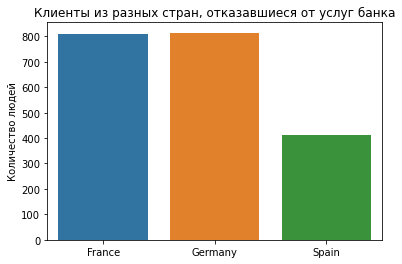

In [44]:
geography_aggregated = df.groupby(by='Geography')['Exited'].sum()

plt.title('Клиенты из разных стран, отказавшиеся от услуг банка')
plt.ylabel('Количество людей')
sns.barplot(x=geography_aggregated.index.values, y=geography_aggregated.values);

In [45]:
print('Общее количество клиентов из различных стран:')
df.groupby(by='Geography')['Exited'].count()

Общее количество клиентов из различных стран:


Geography
France     5014
Germany    2509
Spain      2477
Name: Exited, dtype: int64

### Вывод
Несмотря на то, что в Германии и Испании количество пользователей банка приблизительно равно (2509 и 2477 человек соответственно), отток клиентов в Германии сопоставим с оттоком клиентов во Франции (при двухкратной разнице в количестве пользователей, во Франции их 5014). Таким образом, клиенты из Германии показывают наименьшую лояльность

### Есть ли зависимость между полом и оттоком клиентов?

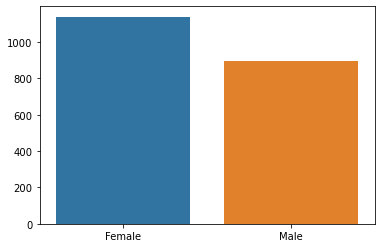

In [18]:
gender_aggregated = df.groupby(by='Gender')['Exited'].sum()
sns.barplot(x=gender_aggregated.index.values, y=gender_aggregated.values);

### Вывод
Хоть количество клиентов-мужчин (5457) и больше, чем клиентов-женщин (4543), однако отток среди них встречается реже приблизительно на 20 %

### Есть ли зависимость между возрастом и оттоком клиентов

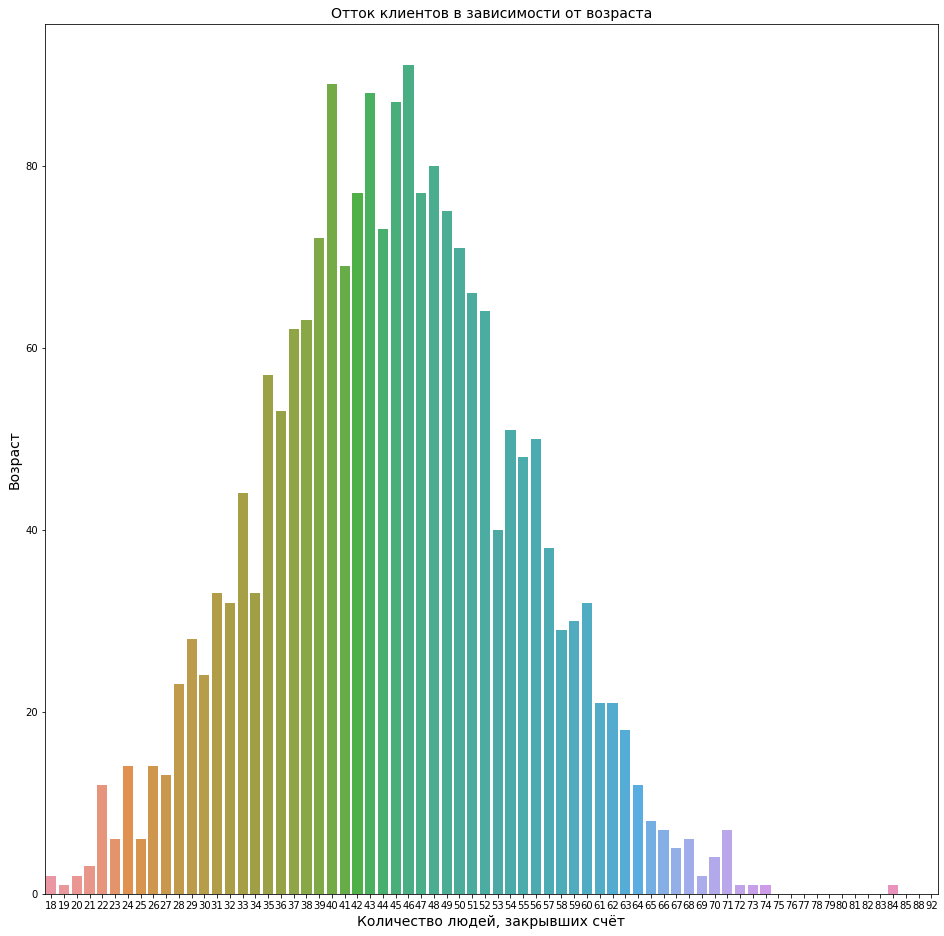

In [63]:
age_aggregated = df.groupby(by='Age')['Exited'].sum()

plt.figure(figsize=(16,16));
plt.title('Отток клиентов в зависимости от возраста', fontsize=14);
plt.xlabel('Количество людей, закрывших счёт', fontsize=14);
plt.ylabel('Возраст', fontsize=14);
sns.barplot(x=age_aggregated.index.values, y=age_aggregated.values);

### Вывод
График выглядит колоковидно, однако можно заметить, что правая (относительно среднего) часть графика все же больше левой, что говорит о повышенной тенденции оттока среди людей пожилого возраста

### Есть ли зависимость между балансом и оттоком клиентов?
Разделим баланс по процентилям 33% и 66% и отделим нулевые значения

In [21]:
zero_balances = df[df['Balance'] == 0]

In [22]:
balance_metrics = df[df['Balance'] > 0]['Balance'].describe(percentiles=[.33, .66])
balance_metrics

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
33%      106901.451200
50%      119839.690000
66%      131564.570000
max      250898.090000
Name: Balance, dtype: float64

In [23]:
procentile_33 = balance_metrics[4]
procentile_66 = balance_metrics[6]

In [24]:
def balance_to_categories(row):
    if row <= procentile_33:
        return 'low_balance'
    elif procentile_33 < row < procentile_66:
        return 'medium_balance'
    else:
        return 'high_balance'

In [25]:
df['Balance_category'] = df['Balance'].apply(balance_to_categories)

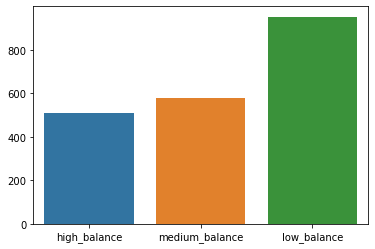

In [26]:
balance_aggregated = df.groupby(by='Balance_category')['Exited'].sum().sort_values()
sns.barplot(x=balance_aggregated.index.values, y=balance_aggregated.values);


In [27]:
df.groupby(by='Balance_category')['Exited'].count()

Balance_category
high_balance      2170
low_balance       5724
medium_balance    2106
Name: Exited, dtype: int64

### Вывод
Отток пользователей не коррелирует с балансом, так как количество ушедших пользователей больше в той категории баланса, где пользователей самих по себе больше

### Есть ли зависимость между количеством используемых продуктов и оттоком клиентов?

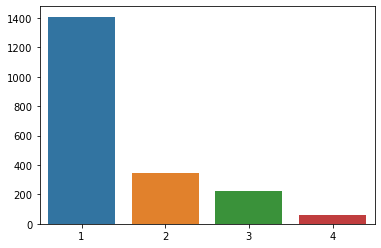

In [28]:
num_of_products_aggregated = df.groupby(by='NumOfProducts')['Exited'].sum()
sns.barplot(x=num_of_products_aggregated.index.values, y=num_of_products_aggregated.values);

In [29]:
df.groupby(by='NumOfProducts')['Exited'].count()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: Exited, dtype: int64

### Вывод
Несмотря на то, что клиентов, которые используют два продукта лишь на 494 человека меньше, значения оттока в этих категориях разительно отличаются: количество ушедших при использовании двух продуктов против одного меньше почти в 4 раза.

### Есть ли зависимость между наличием кредитной карты и оттоком клиентов?

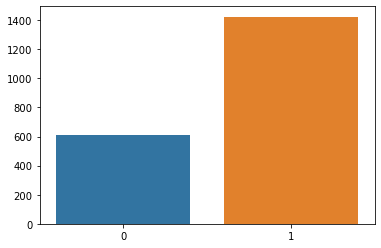

In [30]:
credit_card_aggregated = df.groupby(by='HasCrCard')['Exited'].sum()
sns.barplot(x=credit_card_aggregated.index.values, y=credit_card_aggregated.values);

In [31]:
df.groupby(by='HasCrCard')['Exited'].count()

HasCrCard
0    2945
1    7055
Name: Exited, dtype: int64

### Вывод
Пользователей с кредитной картой больше (7055), чем без неё (2945). И это напрямую связано с тем, что количество ушедших пользователей с кредитной картой приблизительно в два раза больше

### Есть ли зависимость между активностью клиентов и их оттоком?

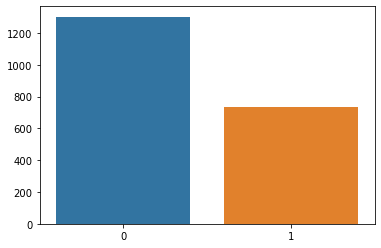

In [32]:
activ_aggregated = df.groupby(by='IsActiveMember')['Exited'].sum()
sns.barplot(x=activ_aggregated.index.values, y=activ_aggregated.values);

In [33]:
df.groupby(by='IsActiveMember')['Exited'].count()

IsActiveMember
0    4849
1    5151
Name: Exited, dtype: int64

### Вывод
При приблизительно равном количестве пользователей в категориях активности (4849 и 5151) отток активных пользователей почти в два раза меньше

### Зависимость заработной платы и оттока

In [34]:
salary_metrics = df['EstimatedSalary'].describe(percentiles=[.33, .66]).astype(np.uint32)
salary_metrics

count     10000
mean     100090
std       57510
min          11
33%       66392
50%      100193
66%      131508
max      199992
Name: EstimatedSalary, dtype: uint32

In [35]:
salary_33 = salary_metrics[4]
salary_66 = salary_metrics[6]

In [36]:
def salary_to_categories(row):
    if row <= procentile_33:
        return 'low_salary'
    elif procentile_33 < row < procentile_66:
        return 'medium_salary'
    else:
        return 'high_salary'

In [37]:
df['Salary_category'] = df['EstimatedSalary'].apply(salary_to_categories)

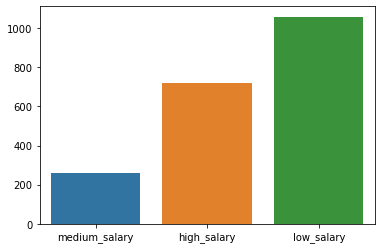

In [38]:
salary_aggregated = df.groupby(by='Salary_category')['Exited'].sum().sort_values()
sns.barplot(x=salary_aggregated.index.values, y=salary_aggregated.values);

In [39]:
df.groupby(by='Salary_category')['Exited'].count()

Salary_category
high_salary      3397
low_salary       5368
medium_salary    1235
Name: Exited, dtype: int64

### Вывод
Количество ушедших пользователей больше в той категориях заработной платы, где пользователей самих по себе больше. Корреляции не наблюдается